In [1]:
#This notebook is for TSF GRIP Data Science and Business analytics Task 2 Problem 1 

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#reading data
df = pd.read_csv("../input/grip-task1/GRIP_TASK1.csv")
df.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


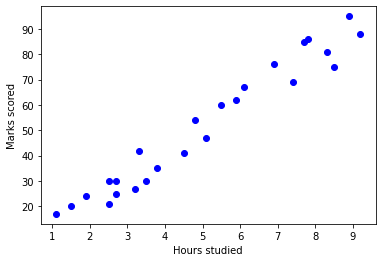

In [6]:
#Scatter plot of the data
plt.scatter(df['Hours'],df['Scores'],color='blue')
plt.xlabel("Hours studied")
plt.ylabel("Marks scored")
plt.show()


# **Linear Regression**

In [7]:
#Preparing the data

x = np.array(df["Hours"]).reshape(25,1)
y = np.array(df["Scores"]).reshape(25,1)

In [8]:
#Splitting data into Training and Testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)


In [9]:
#Applying Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("Training complete")

Training complete


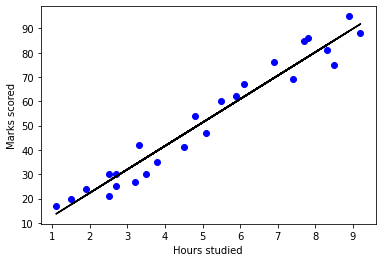

In [10]:
#exploring the results

pred_scores = model.predict(x)
plt.scatter(df['Hours'],df['Scores'],color='blue')
plt.xlabel("Hours studied")
plt.ylabel("Marks scored")
plt.plot(x,pred_scores,color="black")

plt.show()

# **Predicting the Scores**

In [11]:
pred_scores[:5]

array([[27.17575262],
       [52.25183497],
       [33.92700556],
       [85.04363496],
       [36.82039967]])

In [12]:
#comparing the predicted and actual scores
Score = pd.DataFrame({"Actual Scores": df["Scores"], "Predicted Scores": pred_scores.reshape(25,)})
Score.head(10)

,Actual Scores,Predicted Scores
0,21,27.175753
1,47,52.251835
2,27,33.927006
3,75,85.043635
4,30,36.820400
5,20,17.531106
6,88,91.794888
7,60,56.109694
8,81,83.114706
9,25,29.104682


In [13]:
#using Custom Data

hours = [[9.25]]
custom_predict = model.predict(hours)
print("For {} hours the student can get {} marks".format(hours[0][0],custom_predict[0][0]))


For 9.25 hours the student can get 92.27712025794261 marks


# **Evaluating the Model**

In [14]:
# Accuracy of the Model

print(model.score(x_test,y_test))

0.9529553669214876


In [15]:
#mean square error of the Model

from sklearn import metrics
loss = metrics.mean_squared_error(y,pred_scores)
print("The Mean Square Error is "+ str(loss))


The Mean Square Error is 28.993937497607853
